In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
traffic_data = pd.read_csv('hw03-data/Traffic Data/Lekagul Sensor Data.csv')

In [4]:
traffic_data

,Timestamp,car-id,car-type,gate-name
0,2015-05-01 00:43:28,20154301124328-262,4,entrance3
1,2015-05-01 01:03:48,20154301124328-262,4,general-gate1
2,2015-05-01 01:06:24,20154301124328-262,4,ranger-stop2
3,2015-05-01 01:09:25,20154301124328-262,4,ranger-stop0
4,2015-05-01 01:12:36,20154301124328-262,4,general-gate2
...,...,...,...,...
171472,2016-05-31 23:40:13,20161031111001-854,6,ranger-stop2
171473,2016-05-31 23:42:08,20165831105856-579,1,general-gate4
171474,2016-05-31 23:43:13,20161031111001-854,6,general-gate1
171475,2016-05-31 23:49:45,20165831105856-579,1,general-gate7


In [5]:
traffic_data['gate-name'].unique()

array(['entrance3', 'general-gate1', 'ranger-stop2', 'ranger-stop0',
       'general-gate2', 'general-gate5', 'entrance4', 'entrance1',
       'general-gate7', 'general-gate4', 'entrance2', 'camping6',
       'camping2', 'camping3', 'ranger-base', 'gate8', 'camping0',
       'gate3', 'ranger-stop3', 'camping8', 'general-gate3',
       'general-gate6', 'gate4', 'camping7', 'ranger-stop5', 'gate5',
       'ranger-stop6', 'entrance0', 'camping5', 'ranger-stop4', 'gate6',
       'gate7', 'ranger-stop7', 'camping4', 'gate2', 'ranger-stop1',
       'general-gate0', 'camping1', 'gate1', 'gate0'], dtype=object)

In [9]:
traffic_sorted = traffic_data.sort_values(by=['car-id', 'Timestamp'])
traffic_sorted

,Timestamp,car-id,car-type,gate-name
36467,2015-07-01 13:00:09,20150001010009-284,3,entrance3
36511,2015-07-01 13:20:53,20150001010009-284,3,general-gate1
36516,2015-07-01 13:23:32,20150001010009-284,3,ranger-stop2
36524,2015-07-01 13:26:36,20150001010009-284,3,ranger-stop0
36528,2015-07-01 13:29:51,20150001010009-284,3,general-gate2
...,...,...,...,...
156058,2016-03-29 13:05:01,20165929105935-538,2P,general-gate5
156061,2016-03-29 13:13:51,20165929105935-538,2P,gate8
156062,2016-03-29 13:15:15,20165929105935-538,2P,ranger-base
156234,2016-03-30 18:59:38,20165930065938-555,3,entrance3


In [19]:
traffic_path = traffic_data.groupby(['car-id', 'car-type']).agg({
    'Timestamp': list,
    'gate-name': list
}).reset_index()

# Renaming columns to clarify the new structure
traffic_path.columns = ['car-id', 'car-type', 'path-timestamps', 'path-gate-names']
traffic_path

,car-id,car-type,path-timestamps,path-gate-names
0,20150001010009-284,3,"[2015-07-01 13:00:09, 2015-07-01 13:20:53, 201...","[entrance3, general-gate1, ranger-stop2, range..."
1,20150001050042-811,1,"[2015-09-01 17:00:42, 2015-09-01 17:16:30, 201...","[entrance2, general-gate6, camping7, camping7,..."
2,20150001060025-421,2,"[2015-09-01 06:00:25, 2015-09-01 06:10:32, 201...","[entrance4, general-gate5, general-gate2, rang..."
3,20150001070000-174,1,"[2015-09-01 07:00:00, 2015-09-01 07:18:27, 201...","[entrance2, general-gate2, ranger-stop0, range..."
4,20150001070006-104,1,"[2015-08-01 07:00:06, 2015-08-01 07:19:37, 201...","[entrance2, general-gate2, ranger-stop0, range..."
...,...,...,...,...
18703,20165928085923-695,1,"[2016-05-28 20:59:23, 2016-05-28 21:24:40]","[entrance3, entrance0]"
18704,20165928125928-824,2,"[2016-05-28 12:59:28, 2016-05-28 13:09:10, 201...","[entrance4, general-gate5, general-gate2, rang..."
18705,20165929085939-676,2P,"[2016-04-29 08:59:39, 2016-04-29 09:01:01, 201...","[ranger-base, gate8, general-gate5, gate3, ran..."
18706,20165929105935-538,2P,"[2016-03-29 10:59:35, 2016-03-29 11:00:57, 201...","[ranger-base, gate8, gate5, ranger-stop6, rang..."


In [22]:
traffic_path.iloc[0]['path-gate-names']

['entrance3',
 'general-gate1',
 'ranger-stop2',
 'ranger-stop0',
 'general-gate2',
 'general-gate5',
 'camping6',
 'camping6',
 'entrance2']

Get the path coordinates from the bmp file

In [50]:
# pip install pillows

ERROR: Could not find a version that satisfies the requirement pillows (from versions: none)
ERROR: No matching distribution found for pillows

[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [46]:
from PIL import Image
import numpy as np

# Load the image
map = Image.open('hw03-data/Traffic Data/Lekagul Roadways.bmp')

# Convert to numpy array
map_data = np.array(map)
print(map_data)

# Get coordinates of white pixels (value 255)
white_coordinates = np.argwhere(map_data == 255)
white_coordinates

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


array([], shape=(0, 2), dtype=int64)

In [32]:
# Define the coordinates for each gate/location
gates_coordinates = {
    'camping0': (52, 41), 'camping1': (129, 50), 'camping2': (44, 64), 'camping3': (45, 68),
    'camping4': (48, 89), 'camping5': (20, 121), 'camping6': (150, 177), 'camping7': (181, 145),
    'camping8': (183, 48), 'entrance0': (62, 13), 'entrance1': (17, 67), 'entrance2': (183, 87),
    'entrance3': (115, 167), 'entrance4': (140, 184), 'gate0': (63, 33), 'gate1': (58, 44),
    'gate2': (24, 54), 'gate3': (149, 60), 'gate4': (164, 114), 'gate5': (131, 146),
    'gate6': (116, 151), 'gate7': (87, 160), 'gate8': (138, 181), 'general-gate0': (110, 9),
    'general-gate1': (64, 25), 'general-gate2': (104, 32), 'general-gate3': (186, 55),
    'general-gate4': (69, 98), 'general-gate5': (124, 111), 'general-gate6': (136, 137),
    'general-gate7': (65, 144), 'ranger-base': (128, 175), 'ranger-stop0': (89, 16),
    'ranger-stop1': (19, 24), 'ranger-stop2': (80, 35), 'ranger-stop3': (148, 45),
    'ranger-stop4': (18, 95), 'ranger-stop5': (151, 118), 'ranger-stop6': (123, 147),
    'ranger-stop7': (100, 152)
}

In [33]:
example_car_data = traffic_path.iloc[0]
# Extract timestamps and path gate names
car_id = example_car_data['car-id']
timestamps = example_car_data['path-timestamps']
path_gate_names = example_car_data['path-gate-names']

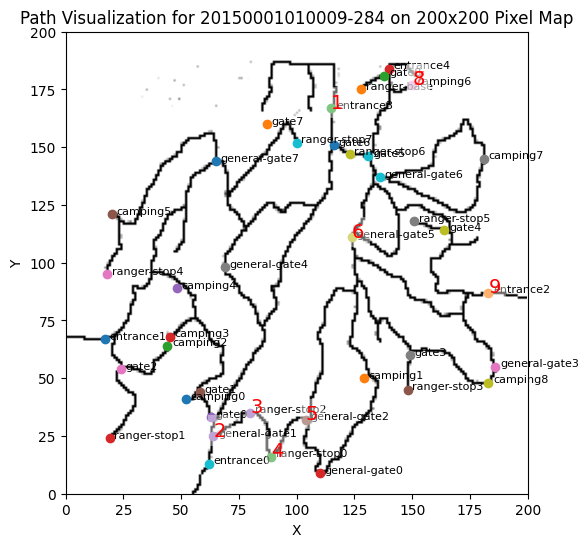

In [34]:
# Plot the map, area, and path
plt.figure(figsize=(6, 6))

reverted_map = 200 - map_data
plt.imshow(reverted_map, cmap='gray')  # Using a grayscale colormap

# Plot each location
for name, (x, y) in gates_coordinates.items():
    plt.scatter(x, y, label=name)
    plt.text(x + 2, y, name, fontsize=8)

# Annotate the path with gate names and timestamps
for i, gate in enumerate(path_gate_names):
    x, y = gates_coordinates[gate]

    # # Annotate timestamps below
    # plt.text(x, y - 5, timestamps[i], fontsize=8, color='red', 
    #          bbox=dict(facecolor='white', alpha=0.8, edgecolor='none'))  # Annotate timestamps below
    
    plt.text(x, y, str(i + 1), fontsize=14, color='red', 
             bbox=dict(facecolor='white', alpha=0.4, edgecolor='none'))  # Use index as number

# Set the limits and titles
plt.xlim(0, 200)
plt.ylim(0, 200)
plt.title(f"Path Visualization for {car_id} on 200x200 Pixel Map")
plt.xlabel("X")
plt.ylabel("Y")


# Show the plot
plt.show()